In [20]:
# imports 
import fbprophet
from fbprophet import Prophet
import pandas as pd
import numpy as np

In [22]:
print(fbprophet.__version__)

0.2.1


In [24]:
df = pd.read_csv("C:\\Users\\Swapnil.Walke\\PycharmProjects\\ObjectDetection\\features_f.csv")
df['y'] = np.log(df['y'])
print(df.head())

   Unnamed: 0                  ds         y
0           0  18:01:2018 0:10:01  4.544464
1           1  18:01:2018 0:06:01  4.426880
2           2  18:01:2018 0:09:01  4.506785
3           3  18:01:2018 0:12:01  4.492001
4           4  18:01:2018 0:15:01  4.441003


In [25]:
m = Prophet()
m.fit(df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\users\swapnil.walke\appdata\local\continuum\anaconda3\envs\pytorch0.4\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [26]:
# for hour wise frequency set freq='H'
future = m.make_future_dataframe(freq='H', periods=10)

In [27]:
# make forecast
forecast = m.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

                     ds      yhat  yhat_lower  yhat_upper
947 2018-05-04 05:33:01  4.499370    4.446093    4.554150
948 2018-05-04 06:33:01  4.499404    4.440960    4.554403
949 2018-05-04 07:33:01  4.499437    4.443011    4.551383
950 2018-05-04 08:33:01  4.499470    4.447969    4.556833
951 2018-05-04 09:33:01  4.499504    4.440327    4.556921


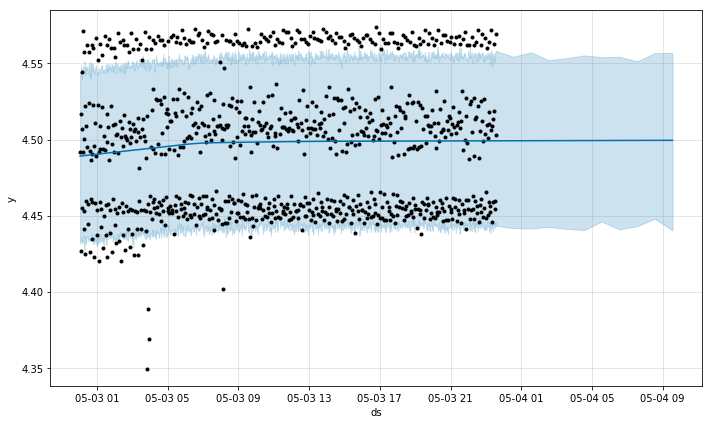

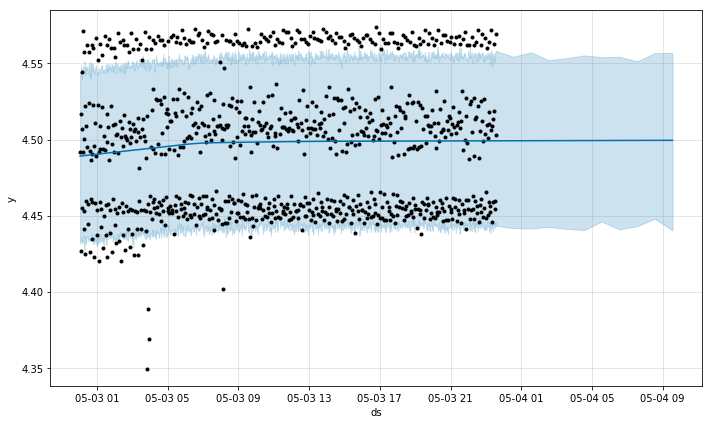

In [28]:
m.plot(forecast)